# Titanic: Machine Learning from Disaster

This dataset is available on **Kaggle : https://www.kaggle.com/c/titanic/data**

## Loading the libraries

In [1]:
import time, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# data viualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Preprocessing 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Machine learning 
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Let's ignore warnings for now
import warnings
warnings.filterwarnings("ignore")

## Import the dataset

After downloading the data, we need to get it into the notebook.

To read the dataset, we will use the read_csv() Pandas method:

In [2]:
# Import the train & test data
train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
test = df_test.copy() # making a copy of test data to make predictions
gender_submission = pd.read_csv("gender_submission.csv") # example of what a submission should look like

In [3]:
# Let's check shape (number of rows, number of columns) of the train & test data
print("Train data - rows:",train.shape[0],", columns:", train.shape[1])
print()
print("Test data - rows:",test.shape[0],", columns:", test.shape[1])

Train data - rows: 891 , columns: 12

Test data - rows: 418 , columns: 11


Now, let's have a first look at our training data!

In [4]:
# Let's view the training data
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# Let's view the test data (same columns as the training data)
df_test.head() # head = view first 5 lines

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Let's have a look at the example submisison dataframe
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
gender_submission.shape

(418, 2)

## Data Descriptions

* **Survival:** 0 = No, 1 = Yes


* **pclass (Ticket class):** 1 = 1st, 2 = 2nd, 3 = 3rd


* **sex:** Sex


* **Age:** Age in years


* **sibsp:** number of siblings/spouses aboard the Titanic


* **parch:** number of parents/children aboard the Titanic


* **ticket:** Ticket number


* **fare:** Passenger fare


* **cabin:** Cabin number


* **embarked:** Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above we can see that **38% out of the training-set survived the Titanic**. We can also see that the passenger ages range from 0.4 to 80. On top of that we can already detect some features, that contain missing values, like the 'Age' feature.

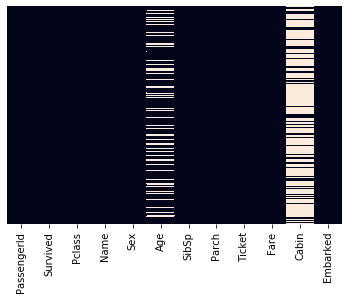

In [9]:
## Let's visualize the missing values using plot
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)
plt.show()

Ok we can clearly see some missing values here. Especially in the cabin column.

It's important to visualise missing values early to know where the major holes are in dataset.

Knowing this informaiton will help in EDA and figuring out what kind of data cleaning and preprocessing is needed.

In [10]:
# Alternatively, we can see the number of missing values like this
train.isnull().sum().sort_values(ascending = False)  ## using sort_values we can sort values in descending order

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [11]:
# Missing values in test data
test.isnull().sum().sort_values(ascending = False) 

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

The rule of thumb is that it's better to impute the missing values rather than ditch the features altogether. After all, there is still some info hidden in these features.

After the following analysis, we will conclude that we can easily impute 'Age' missing values.

## Datatypes in the dataframe

As a general rule of thumb, features with a datatype of object could be considered categorical features. And those which are floats or ints (numbers) could be considered numerical features.

However, we might find features which are numerical may actually be categorical.

In [12]:
# Let's check for different data types in the train dataset
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
# Let's check for different data types in the test dataset
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Let's explore each of these features individually

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Target Feature: Survived

Description: Whether the passenger survived or not.

Key: 0 = did not survive, 1 = survived

This is the variable we want our machine learning model to predict based off all the others.

0    549
1    342
Name: Survived, dtype: int64



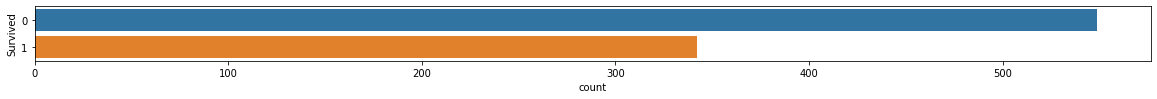

In [15]:
# How many people survived
print(train.Survived.value_counts())
print()
plt.figure(figsize=(20,1))
sns.countplot(y= "Survived", data = train)
plt.show()

## Feature: Pclass 

Description: The ticket class of the passenger.

Key: 1 = 1st, 2 = 2nd, 3 = 3rd

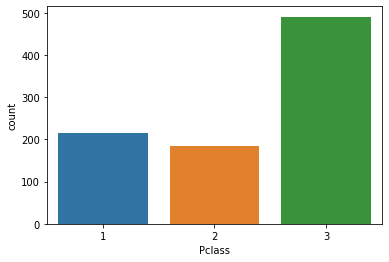

In [16]:
sns.countplot(train['Pclass'])
plt.show()

A "clean" categorical feature here, with 3 categories.

In [17]:
# Let's check missing values
train.Pclass.isnull().sum()

0

Here, we can see there are no missing values in Pclass.


## Feature: Name

Description: The name of the passenger.

In [18]:
train.Name.value_counts()

Saad, Mr. Khalil                                      1
Sharp, Mr. Percival James R                           1
Gaskell, Mr. Alfred                                   1
Harrington, Mr. Charles H                             1
Rice, Master. Eugene                                  1
                                                     ..
Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkinson)    1
Carr, Miss. Helen "Ellen"                             1
West, Miss. Constance Mirium                          1
Reed, Mr. James George                                1
Andersson, Miss. Ingeborg Constanzia                  1
Name: Name, Length: 891, dtype: int64

Every row has a unique name. This is equivalent to the passenger ID. But name could be used differently.

We can use the Name feature also to build our model by creating new features out of the names or by reducing the number of different names.

In [19]:
# Let's drop this Name & PassengerId from data
train.drop(columns = ["Name","PassengerId"], axis = 1, inplace = True)
test.drop(columns = ["Name","PassengerId"], axis = 1, inplace = True)

## Feature: Sex

Description: The sex of the passenger (male or female).

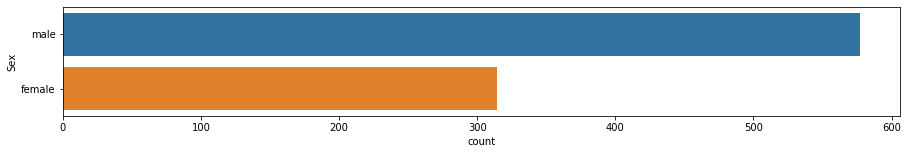

In [20]:
# Let's view the distribution of Sex
plt.figure(figsize=(15, 2))
sns.countplot(y="Sex", data=train);

Another "nice" categorical feature here with 2 categories.

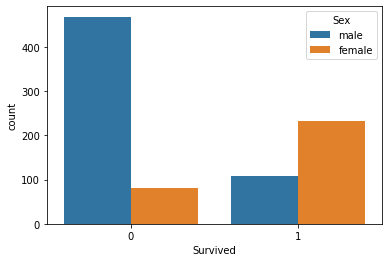

In [21]:
sns.countplot(x = 'Survived', hue = 'Sex', data = train)
plt.show()

It is obvious from this plot that females have a much better chance of surviving.

In [22]:
# Let's check for missing values in train data
train.Sex.isnull().sum()

0

## Feature: Age

Description: The age of the passenger.

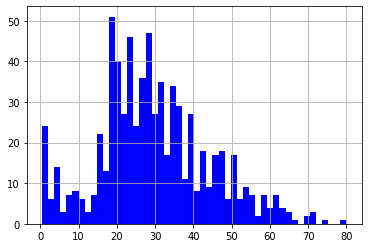

In [23]:
train['Age'].hist(bins = 50, color = 'blue')
plt.show()

In [24]:
# Let's check for missing values in Age feature
train.Age.isnull().sum()

177

The distribution for "Age" looks good, but there are 177 missing values.

## Feature: SibSp

Description: The number of siblings/spouses the passenger has aboard the Titanic.

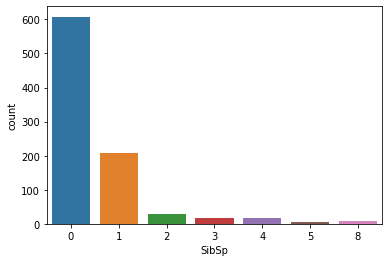

In [25]:
sns.countplot(train['SibSp'])
plt.show()

Another nice categorical feature with 7 categories.

## Feature: Parch

Description: The number of parents/children the passenger has aboard the Titanic.

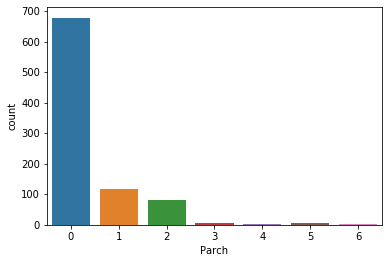

In [26]:
sns.countplot(train['Parch'])
plt.show()

There are 7 categories in Parch feature. 

## Feature: Ticket

Description: The ticket number of the boarding passenger.

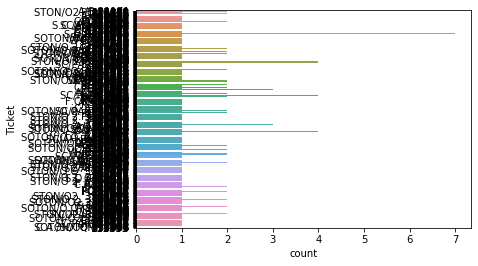

In [27]:
# Let's see how many kind's of ticket's are there using plot
sns.countplot(y="Ticket", data=train);

That doesn't look too good, Let's look at it using another way.

In [28]:
# Let's see how many kind's of ticket's are there
train.Ticket.value_counts()

CA. 2343            7
347082              7
1601                7
3101295             6
CA 2144             6
                   ..
370376              1
PC 17476            1
315094              1
349227              1
SOTON/O2 3101287    1
Name: Ticket, Length: 681, dtype: int64

In [29]:
# How many kinds of Ticket are there?
print("There are {} unique Ticket values.".format(len(train.Ticket.unique())))

There are 681 unique Ticket values.


it's not looking informative at all.

Here, we can see 681 unique values. We won't use this feature to build our model.

In [30]:
# Let's drop this feature from our dataset
train.drop("Ticket", axis = 1, inplace = True)
test.drop("Ticket", axis = 1, inplace = True)

## Feature: Fare
Description: How much the ticket cost.

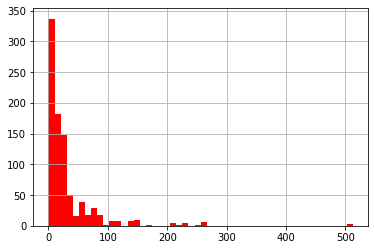

In [31]:
train['Fare'].hist(bins = 50, color = 'red')
plt.show()

So, it's a continuous feature and from the above plot we can see that it's right skewed.

In [32]:
# Let's check for missing values in Fare
print("Train : ",train["Fare"].isnull().sum())
print("Test : ",test["Fare"].isnull().sum())

Train :  0
Test :  1


In [33]:
# Let's fill missing value in test data using forward fill
print(len(test))
test = test.fillna(method = "ffill")
print(len(test))

418
418


## Feature: Cabin
Description: The cabin number where the passenger was staying.

In [34]:
train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
E101           3
C22 C26        3
              ..
A14            1
C45            1
B71            1
B79            1
B42            1
Name: Cabin, Length: 147, dtype: int64

Another categorical variable, it looks a bit complicated.

Since there are too many missing values, we won't use Cabin for our models.

In [35]:
# Let's drop Cabin feature
train.drop("Cabin", axis = 1, inplace = True)
test.drop("Cabin", axis =1, inplace = True)

## Feature: Embarked

Description: The port where the passenger boarded the Titanic.

Key: C = Cherbourg, Q = Queenstown, S = Southampton

In [36]:
# Let's check what kind of values are in Embarked
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Embarked is a categorical variable because there are 3 categories which a passenger could have boarded on.

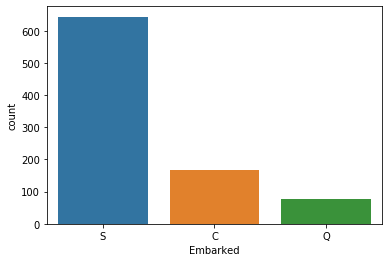

In [37]:
sns.countplot(train['Embarked'])
plt.show()

In [38]:
# Let's check for missing values in Embarked
train["Embarked"].isnull().sum()

2

**How can we deal with the 2 missing values of Embarked?**

One option is to drop the two rows which don't have an Embarked value.

Another option would be to randomly assign a value of C, Q or S to each row.

For now, we will remove those rows.

In [39]:
# Let's remove Embarked rows which are missing values
print(len(train))
train = train.dropna(subset=['Embarked'])
print(len(train))

891
889


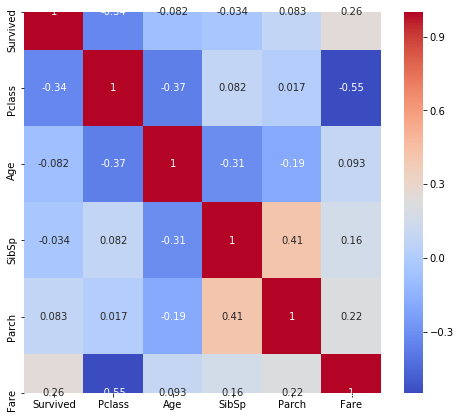

In [40]:
# Let's see features correlation matrix using heatmap
plt.figure(figsize=(8,7))
sns.heatmap(train.corr(), annot = True, cmap = "coolwarm")
plt.show()

From the above heatmap, we can see the correlations are pretty low, so no multicollinearity present here. Since we are interesting in imputing 177 'Age' missing values, we have an additional reason to look closely to the correlation matrix.

From the above heatmap we can see highest correlated variable to "Age" in absolute values is "Pclass", with |corr(Age, Pclass)| = 0.37

In [41]:
## Let's impute missing values of Age feature using Pclass since they have the highest correlation in absolute numbers
train['Age'] = train.groupby("Pclass")['Age'].transform(lambda x: x.fillna(x.median()))
test['Age'] = test.groupby("Pclass")['Age'].transform(lambda x: x.fillna(x.median()))

In [42]:
print(train["Age"].isnull().sum())
print(test["Age"].isnull().sum())

0
0


No missing values for 'Age' now.

## Feature Encoding

Now we can encode the features so they're ready to be used with our machine learning models.

In [43]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [44]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [45]:
# Let's convert the categorical variables into dummy/indicator variables using get_dummies() 
train = pd.get_dummies(data = train, columns = ["Sex", "Embarked", "Pclass"])
test = pd.get_dummies(data = test, columns = ["Sex", "Embarked", "Pclass"])

## Let's start Building Machine Learning Models

Now our data has been converted into numbers, we can run a series of different machine learning algorithms over it to find which model can give the best results.

### Let's seperate the data first

In [46]:
# Let's split the dataset into data and labels
X_train = train.drop("Survived", axis = 1)  # data
y_train = train["Survived"] # labels

In [47]:
# Let's check the shape of the data without labels
X_train.shape

(889, 12)

In [48]:
# Let's check the shape of the labels
y_train.shape

(889,)

#### Now let's define a function to fit machine learning algorithms

Since many of the algorithms we will use are from the sklearn library, they all take similar (practically the same) inputs and produce similar outputs.

To prevent writing code multiple times, we will functionise fitting the model and returning the accuracy scores.

In [49]:
# Let's write a function that runs the requested algorithm and returns the accuracy metrics
def fit_model(algo, X_train, y_train, cv):
    
    model = algo.fit(X_train, y_train)    
    y_pred = algo.predict(X_train)    
    accuracy = round(accuracy_score(y_train, y_pred) * 100 , 2)
    
    #cross validation
    y_pred_cv = cross_val_predict(algo, X_train, y_train, cv = cv)
    # cross validation accuracy
    accuracy_cv = round(accuracy_score(y_train, y_pred_cv) * 100 , 2)
    
    return y_pred_cv, accuracy, accuracy_cv

## Logistic Regression

In [50]:
# Logistic Regression
start_time = time.time()

y_pred_cv_lr, accuracy_lr, accuracy_cv_lr = fit_model(LogisticRegression(random_state = 3),
                                                     X_train, y_train, 10)

lr_time = (time.time() - start_time)

print("Accuracy : ",accuracy_lr)
print("Accuracy CV :",accuracy_cv_lr)
print("Running time :",datetime.timedelta(seconds = lr_time))

Accuracy :  80.76
Accuracy CV : 79.75
Running time : 0:00:00.129167


## Random Forest

In [51]:
# Random Forest
rf = RandomForestClassifier(n_estimators = 100, random_state = 3)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)

print('Confusion Matrix : ','\n', confusion_matrix(y_train, y_train_pred))
print()
print("Accuracy : ", round(accuracy_score(y_train, y_train_pred) * 100, 2))

Confusion Matrix :  
 [[542   7]
 [  9 331]]

Accuracy :  98.2


### Hyperparameter Tuning

Hyperparameter Tuning is the technique of choosing an optimal set of hyperparameters (i.e. parameters that control the learning process) for our learning algorithm. We can select these hyperparameters by using hyperparameter optimization or by manual tuning.

In [52]:
# let's optimize hyperparameters in random forest classifier
from scipy.stats import randint as sp_randint
rfc = RandomForestClassifier(random_state=3)

params = {'n_estimators' : sp_randint(50,200),
         'max_depth' : sp_randint(2,50),
          'max_depth' : sp_randint(2,70),
         'min_samples_split' : sp_randint(2,50),
         'min_samples_leaf' : sp_randint(1,500),
         'criterion' : ['gini', 'entropy']}

# RandomizedSearchCV
rsearch_rfc = RandomizedSearchCV(rfc, param_distributions = params, n_iter = 100, cv = 3, scoring = 'roc_auc', n_jobs = -1,\
                             return_train_score = True, random_state = 3)

rsearch_rfc.fit(X_train,y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

Let's print our optimal hyperparameters set.

In [53]:
# Print best hyperparameters
rsearch_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 21,
 'min_samples_leaf': 2,
 'min_samples_split': 20,
 'n_estimators': 119}

In [54]:
pd.DataFrame(rsearch_rfc.cv_results_).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.151995,0.019110,0.028180,2.417162e-03,gini,26,250,5,50,"{'criterion': 'gini', 'max_depth': 26, 'min_sa...",...,0.5,0.5,0.5,0.0,38,0.5,0.5,0.5,0.5,0.0
1,0.540042,0.028699,0.046864,6.836514e-07,entropy,21,203,45,188,"{'criterion': 'entropy', 'max_depth': 21, 'min...",...,0.5,0.5,0.5,0.0,38,0.5,0.5,0.5,0.5,0.0


In [55]:
# let's fit our model to the training set with best hyperparameters
rfc = RandomForestClassifier(**rsearch_rfc.best_params_, random_state = 3)

rfc.fit(X_train, y_train)

y_train_pred = rfc.predict(X_train)

print('Confusion Matrix : ','\n', confusion_matrix(y_train, y_train_pred))
print()
print("Accuracy : ", round(accuracy_score(y_train, y_train_pred) * 100, 2))

Confusion Matrix :  
 [[518  31]
 [ 90 250]]

Accuracy :  86.39


In [56]:
# Feature Importance
imp = pd.DataFrame(rfc.feature_importances_, index = X_train.columns, columns = ['imp'])
imp = imp.sort_values(by ='imp', ascending = False)
imp

,imp
Sex_male,0.238892
Sex_female,0.225044
Fare,0.162068
Age,0.132239
Pclass_3,0.073202
Pclass_1,0.045952
SibSp,0.036733
Parch,0.030564
Pclass_2,0.021627
Embarked_S,0.014246


Featrue importance shows how much each feature contributed to the model.

We can take this information and remove features which don't contribute much to reduce dimenstionality (and save compute), also we can improve features which don't offer much to the overall model.

In [57]:
# Let's make a prediction on the test dataset using our random forest

y_test_pred = rfc.predict(test)

In [58]:
# Our predictions array is comprised of 0's and 1's (Survived or Did Not Survive)
y_test_pred[:20]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [59]:
# Let's create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = df_test['PassengerId']
submission['Survived'] = y_test_pred # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [60]:
# Let's check our test and submission dataframes of same length
if len(submission) == len(df_test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [61]:
# Let's convert submisison dataframe to csv for submission on Kaggle

submission.to_csv('rf_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [62]:
# let's check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv("rf_submission.csv")
submissions_check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


#### Now our predictions are ready!

---